#### Read in tweet data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
import en_core_web_sm

data = pd.read_csv("t_1613701713.615095_allFullTweets.txt", sep=",", encoding='cp1252', header=None)
cols_to_drop=[1,2,3]
data.drop(data.columns[cols_to_drop], axis=1,inplace=True)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
data.rename(columns={0: "User", 4: "Tweet"}, inplace=True)
#data

### Cleaning/Processing Tweet Data

In [29]:
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(@[A-Za-z0–9]+)|(\w+:\/\/\S+)|^rt|http.+?', "",   elem)) 
    return df


In [30]:
data = clean_text(data, 'Tweet')
data

,User,Tweet
0,naaaaattteee,no cap
1,naaaaattteee,eeevvvvverrrrr
2,naaaaattteee,if you in the south just retweet respectfully
3,naaaaattteee,i don’t ever want to hear it’s just a hat it’s just a flag or it’s just a slogan it’s just blatant racism and it always has…
4,naaaaattteee,watch this
...,...,...
34107,SayvonJL,jeff foster
34108,DMeansTV,praying helps a lot
34109,TheMike_B,granny 98 and just said she ready to go home so mama can take care of her
34110,TheMike_B,glad somebody said it


In [31]:
#Removes stopwords, tokenizes and lemmatizes (reduces word to root form)
def tweet_refining(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
       if i.lower() not in stop:
           word = lemmatizer.lemmatize(i)
           final_text.append(word.lower())
    return " ".join(final_text)

In [32]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
data.Tweet = data.Tweet.apply(tweet_refining)
data

,User,Tweet
0,naaaaattteee,cap
1,naaaaattteee,eeevvvvverrrrr
2,naaaaattteee,south retweet respectfully
3,naaaaattteee,don’t ever want hear it’s hat it’s flag it’s slogan it’s blatant racism always has…
4,naaaaattteee,watch
...,...,...
34107,SayvonJL,jeff foster
34108,DMeansTV,praying help lot
34109,TheMike_B,granny 98 said ready go home mama take care
34110,TheMike_B,glad somebody said


### Reading in wordlists

In [33]:
with open('CategoryDining.txt', 'r') as file:
    dining_words = file.read().replace('\n', ' ')
dining = tweet_refining(dining_words)


with open('CategoryEducation.txt', 'r') as file:
    education_words = file.read().replace('\n', ' ')
education = tweet_refining(education_words)


with open('CategoryHealth.txt', 'r') as file:
    health_words = file.read().replace('\n', ' ')
health = tweet_refining(health_words)


with open('CategorySport.txt', 'r') as file:
    sport_words = file.read().replace('\n', ' ')
sport = tweet_refining(sport_words)


with open('CategoryPolitics.txt', 'r') as file:
    politics_words = file.read().replace('\n', ' ')
politics = tweet_refining(politics_words)


with open('CategoryCitizenship.txt', 'r') as file:
    citizenship_words = file.read().replace('\n', ' ')
citizenship = tweet_refining(citizenship_words)


with open('CategoryEntertainment.txt', 'r') as file:
    entertainment_words = file.read().replace('\n', ' ')
entertainment = tweet_refining(entertainment_words)


with open('CategoryFinances.txt', 'r') as file:
    finance_words = file.read().replace('\n', ' ')
finance = tweet_refining(finance_words)

with open('CategoryMyUniversity.txt', 'r') as file:
    university_words = file.read().replace('\n', ' ')
university = tweet_refining(university_words)

with open('CategoryReligion.txt', 'r') as file:
    religion_words = file.read().replace('\n', ' ')
religion = tweet_refining(religion_words)

with open('CategoryTechnology.txt', 'r') as file:
    technology_words = file.read().replace('\n', ' ')
technology = tweet_refining(technology_words)




In [34]:
#Create sets for classifying
str1=dining
words=str1.split()
dining=" ".join(sorted(set(words), key=words.index))
dining

str1=education
words=str1.split()
education=" ".join(sorted(set(words), key=words.index))


str1=health
words=str1.split()
health=" ".join(sorted(set(words), key=words.index))


str1=sport
words=str1.split()
sport=" ".join(sorted(set(words), key=words.index))

str1=politics
words=str1.split()
politics=" ".join(sorted(set(words), key=words.index))

str1=citizenship
words=str1.split()
citizenship =" ".join(sorted(set(words), key=words.index))

str1=entertainment
words=str1.split()
entertainment=" ".join(sorted(set(words), key=words.index))

str1=finance
words=str1.split()
finance =" ".join(sorted(set(words), key=words.index))

str1=university
words=str1.split()
university =" ".join(sorted(set(words), key=words.index))

str1=religion
words=str1.split()
religion =" ".join(sorted(set(words), key=words.index))

str1=technology
words=str1.split()
technology =" ".join(sorted(set(words), key=words.index))

### Jaccard Scoring

In [35]:
###
#Jaccard Similarity: Jaccard similarity or intersection over union is defined as size of 
#intersection divided by size of union of two sets.
#Jaccard similarity takes only unique set of words for each sentence or document while cosine similarity takes 
#total length of the vectors. Jaccard similarity is good for cases where duplication does not matter, 
#cosine similarity is good for cases where duplication matters. In our case, context matters more 
#than duplication thus Jaccard similarity is the ideal technique to use.
###
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores
d_scores = get_scores(dining, data.Tweet.to_list())
e_scores = get_scores(education, data.Tweet.to_list())
h_scores = get_scores(health, data.Tweet.to_list())
s_scores = get_scores(sport, data.Tweet.to_list())
p_scores = get_scores(politics, data.Tweet.to_list())
c_scores = get_scores(citizenship, data.Tweet.to_list())
ent_scores = get_scores(entertainment, data.Tweet.to_list())
f_scores = get_scores(finance, data.Tweet.to_list())
u_scores = get_scores(university, data.Tweet.to_list())
r_scores = get_scores(religion, data.Tweet.to_list())
t_scores = get_scores(technology, data.Tweet.to_list())


In [36]:
# create a jaccard scored df.
cols  = {'names':data.User.to_list(), 'dining_score':d_scores,
         'education_score': e_scores, 'health_score':h_scores, 'sport_score':s_scores, 
         'politics_score':p_scores, 'citizenship_score':c_scores, 'entertainment_score':ent_scores, 'finance_score':f_scores,
        'university_score':u_scores,'religion_score':r_scores, 'technology_score':t_scores}
scores_df = pd.DataFrame(cols)
scores_df


,names,dining_score,education_score,health_score,sport_score,politics_score,citizenship_score,entertainment_score,finance_score,university_score,religion_score,technology_score
0,naaaaattteee,0.111111,0.096774,0.103448,0.096774,0.107143,0.115385,0.103448,0.125000,0.136364,0.115385,0.111111
1,naaaaattteee,0.111111,0.096774,0.103448,0.096774,0.107143,0.115385,0.103448,0.125000,0.136364,0.115385,0.111111
2,naaaaattteee,0.518519,0.451613,0.482759,0.451613,0.500000,0.538462,0.482759,0.583333,0.565217,0.538462,0.518519
3,naaaaattteee,0.689655,0.606061,0.645161,0.606061,0.666667,0.714286,0.645161,0.769231,0.760000,0.714286,0.689655
4,naaaaattteee,0.185185,0.161290,0.172414,0.161290,0.178571,0.192308,0.172414,0.208333,0.173913,0.192308,0.185185
...,...,...,...,...,...,...,...,...,...,...,...,...
34107,SayvonJL,0.296296,0.258065,0.233333,0.258065,0.285714,0.307692,0.275862,0.280000,0.304348,0.307692,0.250000
34108,DMeansTV,0.481481,0.419355,0.448276,0.419355,0.464286,0.500000,0.448276,0.541667,0.590909,0.500000,0.481481
34109,TheMike_B,0.551724,0.531250,0.566667,0.531250,0.533333,0.571429,0.516129,0.615385,0.666667,0.571429,0.551724
34110,TheMike_B,0.444444,0.387097,0.413793,0.387097,0.428571,0.461538,0.413793,0.500000,0.545455,0.461538,0.444444


In [37]:
#assign classes based on highest score
def get_classes(l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11):
    dine = []
    edu = []
    heal = []
    spo = []
    pol = []
    cit = []
    ent = []
    fin = []
    uni = []
    rel = []
    tec = []
    for i, j, k, l, n, o, p, q, r, s, t in zip(l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11):
        m = max(i, j, k, l, n, o, p, q, r, s, t)
        if m != 0:
            if m == i:
                dine.append(1)
            else:
                dine.append(0)
            if m == j:
                edu.append(1)
            else:
                edu.append(0)        
            if m == k:
                heal.append(1)
            else:
                heal.append(0)  
            if m == l:
                spo.append(1)
            else:
                spo.append(0)   
            if m == n:
                pol.append(1)
            else:
                pol.append(0)
            if m == o:
                cit.append(1)
            else:
                cit.append(0)
            if m == p:
                ent.append(1)
            else:
                ent.append(0)        
            if m == q:
                fin.append(1)
            else:
                fin.append(0)  
            if m == r:
                uni.append(1)
            else:
                uni.append(0)   
            if m == s:
                rel.append(1)
            else:
                rel.append(0)
            if m == t:
                tec.append(1)
            else:
                tec.append(0)
        else:
            dine.append(0)
            edu.append(0)
            heal.append(0)
            spo.append(0)
            pol.append(0)
            cit.append(0)
            ent.append(0)
            fin.append(0)
            uni.append(0)
            rel.append(0)
            tec.append(0)
            
            
    return dine, edu, heal, spo, pol, cit, ent, fin, uni, rel, tec

In [38]:
l1 = scores_df.dining_score.to_list()
l2 = scores_df.education_score.to_list()
l3 = scores_df.health_score.to_list()
l4 = scores_df.sport_score.to_list()
l5 = scores_df.politics_score.to_list()

l6 = scores_df.citizenship_score.to_list()
l7 = scores_df.entertainment_score.to_list()
l8 = scores_df.finance_score.to_list()
l9 = scores_df.university_score.to_list()
l10 = scores_df.religion_score.to_list()
l11 = scores_df.technology_score.to_list()


dine, edu, heal, spo, pol, cit, ent, fin, uni, rel, tec = get_classes(l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11)

cols = {'name': scores_df.names.to_list(), 'dining':dine, 'education':edu, 'health': heal, 'sport':spo, 'politics':pol,
       'citizenship':cit, 'entertainment':ent, 'finance':fin, 'university':uni, 'religion':rel, 'technology':tec}

#DF with all tweets classified
class_df = pd.DataFrame(cols)
class_df

,name,dining,education,health,sport,politics,citizenship,entertainment,finance,university,religion,technology
0,naaaaattteee,0,0,0,0,0,0,0,0,1,0,0
1,naaaaattteee,0,0,0,0,0,0,0,0,1,0,0
2,naaaaattteee,0,0,0,0,0,0,0,1,0,0,0
3,naaaaattteee,0,0,0,0,0,0,0,1,0,0,0
4,naaaaattteee,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34107,SayvonJL,0,0,0,0,0,1,0,0,0,1,0
34108,DMeansTV,0,0,0,0,0,0,0,0,1,0,0
34109,TheMike_B,0,0,0,0,0,0,0,0,1,0,0
34110,TheMike_B,0,0,0,0,0,0,0,0,1,0,0


In [39]:
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()

#add a new totals column
new_groups_df['total'] = new_groups_df['dining'] + new_groups_df['education'] + new_groups_df['health'] 
+  new_groups_df['sport'] +  new_groups_df['politics']

#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()  

### Tweet Classification Pie Chart

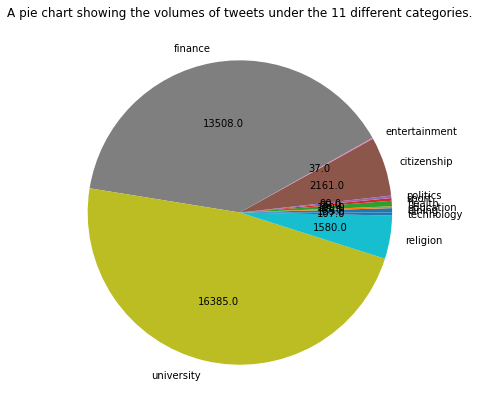

dining             159
education           67
health             199
sport               98
politics            90
citizenship       2161
entertainment       37
finance          13508
university       16385
religion          1580
technology         107
Name: Total, dtype: int64


In [40]:
import matplotlib.pyplot as plt
import numpy as np
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
sizes=a.loc['Total']
plt.pie(sizes, labels = a.columns, autopct=absolute_value)
plt.title('A pie chart showing the volumes of tweets under the 11 different categories.')
plt.show()
print(sizes)

### Clustering 

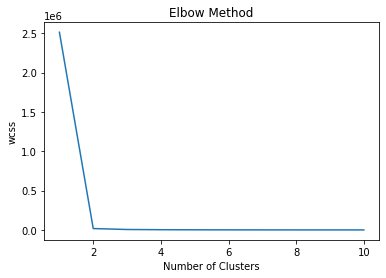

In [49]:
###
#TODO: Make more exhaustive wordlists, clustering currently doesn't work well
###

X = new_groups_df[['politics', 'religion']].values
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


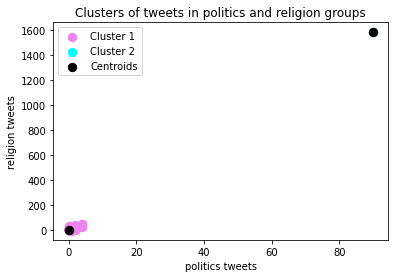

In [52]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
#plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of tweets in politics and religion groups')
plt.xlabel('politics tweets')
plt.ylabel('religion tweets')
plt.legend()
plt.show()

In [53]:
new_groups_df

,dining,education,health,sport,politics,citizenship,entertainment,finance,university,religion,technology,total
name,,,,,,,,,,,,
0hnaij_,0,0,0,0,0,2,0,38,75,1,0,0
15DreamTeam,0,0,0,0,0,1,0,0,0,3,0,0
1DreElder,0,0,0,0,0,0,0,1,3,0,0,0
1PINUPDOLL,0,0,0,0,0,1,0,34,41,0,0,0
1demecio,0,0,0,0,0,1,0,11,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
yungbre_,0,1,1,1,0,1,0,50,70,0,0,2
zdoubleE,0,0,0,0,0,1,0,11,6,0,0,0
zoe_boogie,0,0,0,0,0,0,0,6,8,0,0,0
